# Machine Learning Model on calculating Salary of Employees

In [72]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error                                 #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [73]:
#acquiring the data
Employees_df=pd.read_csv("Employees.csv")

In [74]:
#extracting the general information from the dataset
Employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34218 entries, 0 to 34217
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   NAME                                     34218 non-null  object
 1   JOB TITLE                                34218 non-null  object
 2   DEPARTMENT                               34218 non-null  object
 3   EMPLOYEE ANNUAL SALARY                   34218 non-null  object
 4   ESTIMATED ANNUAL SALARY MINUS FURLOUGHS  34218 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [75]:
#previewing the data
Employees_df.sample(5)

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
5683,"CONNER, ALFONZO",FOREMAN OF CEMENT FINISHERS,TRANSPORTN,$91208.00,$83171.00
18585,"MARAVIC, MANE M",POLICE OFFICER,POLICE,$77238.00,$77238.00
600,"ALVARADO, YARATZED",PUBLIC HEALTH AIDE,HEALTH,$38568.00,$38568.00
19220,"MAZIQUE, RONALD K",CONSTRUCTION LABORER,WATER MGMNT,$73216.00,$66764.00
5033,"CHRISTIAN, RAYMOND",POOL MOTOR TRUCK DRIVER,STREETS & SAN,$70408.00,$70408.00


In [76]:
#checking for the datatypes of all the fields
Employees_df.dtypes

NAME                                       object
JOB TITLE                                  object
DEPARTMENT                                 object
EMPLOYEE ANNUAL SALARY                     object
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    object
dtype: object

In [77]:
#class distribution
Employees_df.groupby("JOB TITLE").size()

JOB TITLE
A/MGR COM SVC-ELECTIONS       1
A/MGR OF MIS-ELECTIONS        2
A/MGR WAREHOUSE-ELECTIONS     1
A/SUPRV REDISTRICTING         1
ACCIDENT ADJUSTER             4
                             ..
WINDOW WASHER                 9
YOUTH SERVICES COORD         13
ZONING ADMINISTRATOR          1
ZONING INVESTIGATOR           6
ZONING PLAN EXAMINER          4
Length: 1124, dtype: int64

In [78]:
#calculation the counts for Job Title
job_titles=Employees_df['JOB TITLE'].value_counts()
job_titles

POLICE OFFICER                    10918
FIREFIGHTER                        1242
FIREFIGHTER-EMT                    1198
SERGEANT                           1177
MOTOR TRUCK DRIVER                  931
                                  ...  
ASST MANAGER  OF COLLECTIONS          1
OFFSET PRESS OPERATOR                 1
FIRST DEPUTY FIRE COMMISSIONER        1
LICENSING COORD                       1
VETERINARIAN-HOURLY                   1
Name: JOB TITLE, Length: 1124, dtype: int64

In [79]:
#checking if any null values present in the dataset
Employees_df.isnull().sum()

NAME                                       0
JOB TITLE                                  0
DEPARTMENT                                 0
EMPLOYEE ANNUAL SALARY                     0
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    0
dtype: int64

In [80]:
#replacing the $ from the columns
Employees_df['EMPLOYEE ANNUAL SALARY'] = Employees_df['EMPLOYEE ANNUAL SALARY'].str.replace('$','')
Employees_df['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'] = Employees_df['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'].str.replace('$','')
Employees_df.head()

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,81000.00,73862.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,74628.00,74628.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,77280.00,70174.00
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,96276.00,96276.00
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,84032.00,76627.00


In [81]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in Employees_df.columns:
    Employees_df[col] = le_x.fit_transform(Employees_df[col])

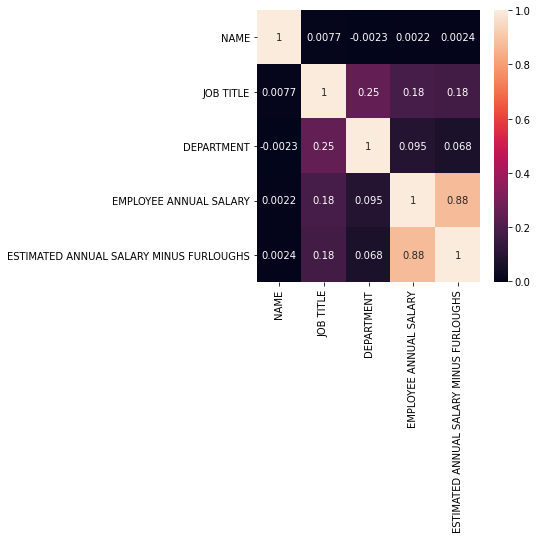

In [82]:
#checking for the correlation
corr_hmap=Employees_df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_hmap,annot=True)

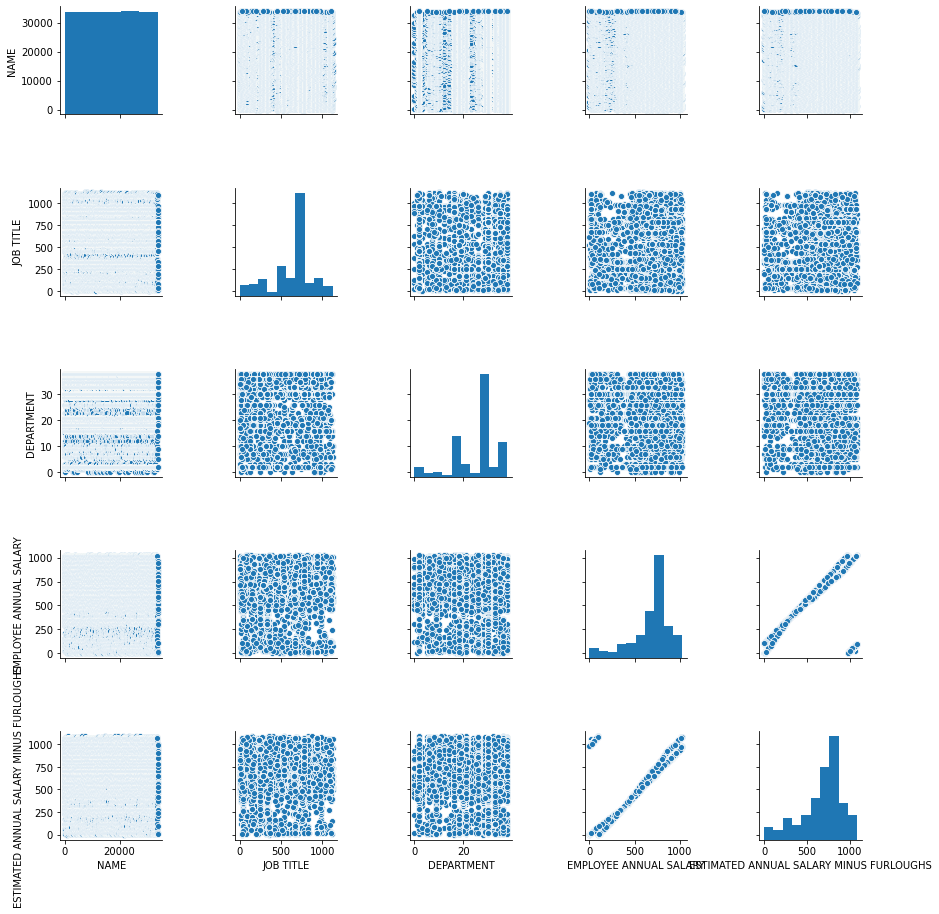

In [83]:
#multiplot visualization
sns.pairplot(Employees_df)

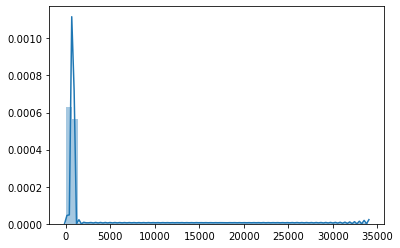

In [84]:
#vizualizing the class
sns.distplot(Employees_df,kde=True)

NAME                                          AxesSubplot(0.125,0.799681;0.168478x0.0803191)
JOB TITLE                                  AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
DEPARTMENT                                 AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
EMPLOYEE ANNUAL SALARY                     AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS       AxesSubplot(0.125,0.703298;0.168478x0.0803191)
dtype: object

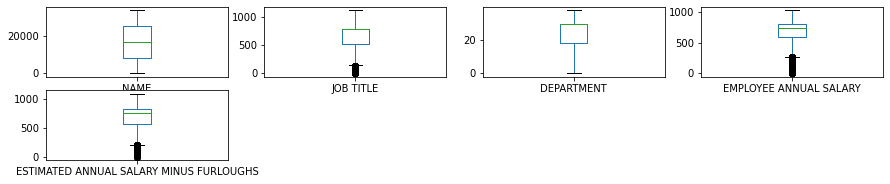

In [85]:
#checking for the outliers
Employees_df.plot(kind='box',subplots=True,layout=(8,4),figsize=(15,12))

In [86]:
#checking the skewness before removing the outliers
Employees_df.skew()

NAME                                      -0.001150
JOB TITLE                                 -0.869632
DEPARTMENT                                -1.065106
EMPLOYEE ANNUAL SALARY                    -1.178566
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS   -0.936278
dtype: float64

In [87]:
#dropping off the columns those are not required
Employees_df.drop(['NAME','DEPARTMENT'],axis=1,inplace=True)

In [88]:
#removing outliers
z_score=np.abs(zscore(Employees_df))
print(Employees_df.shape)
Employees_df_final=Employees_df.loc[(z_score<3).all(axis=1)]
print(Employees_df_final.shape)

(34218, 3)
(34139, 3)


In [89]:
#checking the skewness before removing the outliers
print(Employees_df_final.skew())

JOB TITLE                                 -0.869017
EMPLOYEE ANNUAL SALARY                    -1.171374
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS   -0.931766
dtype: float64


In [90]:
#checking for the statastical report
Employees_df_final.describe()

,JOB TITLE,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
count,34139.000000,34139.000000,34139.000000
mean,654.684935,675.152582,680.469580
std,254.620645,220.508525,240.364812
min,0.000000,6.000000,1.000000
25%,526.000000,591.000000,571.000000
50%,783.000000,733.000000,752.000000
75%,783.000000,811.000000,819.000000
max,1123.000000,1027.000000,1087.000000


In [91]:
#Now separating input and output variable
x=Employees_df_final.drop(['EMPLOYEE ANNUAL SALARY'],axis=1)
y=Employees_df_final['EMPLOYEE ANNUAL SALARY']
print(x.shape)
print(y.shape)

(34139, 2)
(34139,)


In [92]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.80787307,  0.24767058],
       [ 0.50395342,  0.29759542],
       [-1.81325319,  0.06877322],
       ...,
       [ 0.50395342,  0.40576592],
       [ 0.07193185, -2.75198047],
       [-1.80932572, -2.81854693]])

In [93]:
#Machine Learning Models
models=[]
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))

In [94]:
r2_scr_results = []
names = []
for name, model in models:
    print(name)
    max_r2_score=0
    for r_state in range(42,80):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",r2_scr)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr      
            final_r_state=r_state
    r2_scr_results.append(max_r2_score*100)
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_r2_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.769450520907874
random state:  43  accuracy score:  0.7741075495190008
random state:  44  accuracy score:  0.7663378091250601
random state:  45  accuracy score:  0.7854040215758464
random state:  46  accuracy score:  0.753472226668926
random state:  47  accuracy score:  0.7778959356604725
random state:  48  accuracy score:  0.7723907981291985
random state:  49  accuracy score:  0.7858180759382257
random state:  50  accuracy score:  0.784318933606825
random state:  51  accuracy score:  0.7586565957737955
random state:  52  accuracy score:  0.7854944959818233
random state:  53  accuracy score:  0.7850895763728836
random state:  54  accuracy score:  0.8172257252455589
random state:  55  accuracy score:  0.7521918653679629
random state:  56  accuracy score:  0.8018059240005924
random state:  57  accuracy score:  0.7729643708992302
random state:  58  accuracy score:  0.8418058163750382
random state:  59  accuracy score:  0.7726771469192748
random sta

random state:  73  accuracy score:  0.9465194299956713
random state:  74  accuracy score:  0.9606535310613112
random state:  75  accuracy score:  0.9604790931015479
random state:  76  accuracy score:  0.9372778145604806
random state:  77  accuracy score:  0.976322912113783
random state:  78  accuracy score:  0.9439786680868427
random state:  79  accuracy score:  0.9680258281475442

max accuracy score at random state: 53  for the model  GNB  is:  0.9797855107418966




In [95]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=5, scoring="r2")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.7791225938851123
Cross Validation Score(Std):  0.03339309166110759

Model name:  KNN
Cross Validation Score(Mean):  0.9593808838143243
Cross Validation Score(Std):  0.009278826808281189

Model name:  DT
Cross Validation Score(Mean):  0.986831446157707
Cross Validation Score(Std):  0.0044198123755683355

Model name:  GNB
Cross Validation Score(Mean):  0.9501218424391155
Cross Validation Score(Std):  0.007515726561718618



In [96]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':r2_scr_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LinearRegression())",84.180582,77.912259
1,"(KNN, KNeighborsClassifier())",97.725675,95.938088
2,"(DT, DecisionTreeClassifier())",99.971663,98.683145
3,"(GNB, GaussianNB())",97.978551,95.012184


In [97]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=74,test_size=0.10)
model_name=tree.DecisionTreeClassifier()
model_name.fit(x_train,y_train)
y_pred=model_name.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("r2 score: ",r2_scr)
print("mean squared error: ",mse)
print(y_pred_model)

r2 score:  0.9945953763361159
mean squared error:  264.9862331575864
[1012  876  733 ...  658  984  589]


In [98]:
#saving the model as pickle in a file
pickle.dump(model_name,open('dt_mushroom_data.pkl','wb'))

In [99]:
#loading the model for testing
loaded_model=pickle.load(open('dt_mushroom_data.pkl','rb'))
loaded_model.predict(x_test)

array([1012,  876,  733, ...,  658,  984,  589])